# Import Libs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data init

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df_train = df.copy()

In [3]:
df_train.sample(5,random_state =0)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9394,9395,15615753,Upchurch,597,Germany,Female,35,8,131101.04,1,1,1,192852.67,0
898,899,15654700,Fallaci,523,France,Female,40,2,102967.41,1,1,0,128702.10,1
2398,2399,15633877,Morrison,706,Spain,Female,42,8,95386.82,1,1,1,75732.25,0
5906,5907,15745623,Worsnop,788,France,Male,32,4,112079.58,1,0,0,89368.59,0
2343,2344,15765902,Gibson,706,Germany,Male,38,5,163034.82,2,1,1,135662.17,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# we don't nedd rownumber and customerif in our processing 
df_train.drop(columns=["RowNumber","CustomerId"],inplace=True)
df_train.head(1)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


**columns info**
1. Surname: Customer's last name.
2. CreditScore: Customer's credit score.
3. Geography: Country of the customer.
4. Gender: Gender of the customer.
5. Age: Age of the customer.
6. Tenure: Number of years the customer has been with the bank.
7. Balance: Account balance of the customer.
8. NumOfProducts: Number of products the customer has with the bank.
9. HasCrCard: Whether the customer has a credit card (1: Yes, 0: No).
10. IsActiveMember: Whether the customer is an active member (1: Yes, 0: No).
11. EstimatedSalary: Estimated salary of the customer.
12. Exited: Whether the customer has churned (1: Yes, 0: No).


<Axes: xlabel='Exited', ylabel='count'>

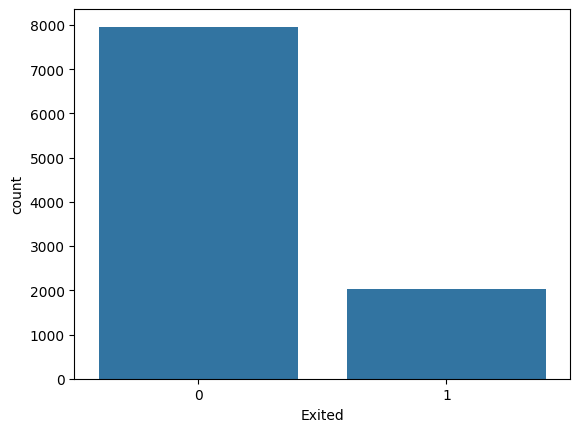

In [6]:
sns.countplot(data=df_train,x="Exited")

### we have imbalanced dataset  we need to solve this problem

In [7]:
exited = df_train[df_train["Exited"]==1]
not_exited = df_train[df_train["Exited"]==0]
not_exited = not_exited.sample(exited.shape[0],random_state=42)
df_train = pd.concat([not_exited,exited])

In [8]:
df_train.sample(5)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9619,Gibbons,684,Germany,Male,35,3,99967.76,1,1,1,176882.08,0
3480,Bruno,588,Germany,Female,30,0,110148.49,1,1,0,5790.90,1
9384,Otutodilichukwu,771,France,Female,57,4,0.00,1,0,0,85876.67,1
1291,Andrews,734,Spain,Female,37,2,130404.92,1,0,0,34548.74,0
2007,Chukwuemeka,705,Germany,Female,43,10,146547.78,1,0,1,10072.55,1


<Axes: xlabel='Exited', ylabel='count'>

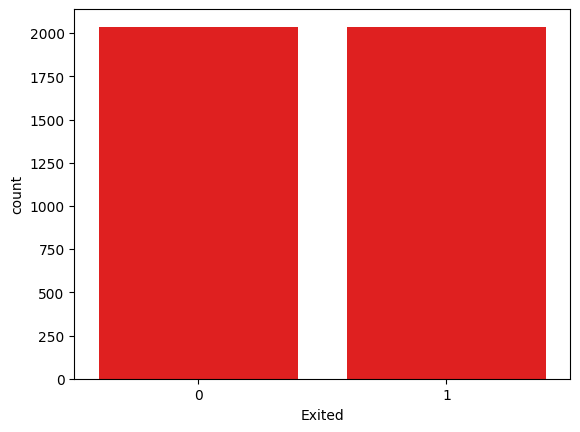

In [9]:
sns.countplot(data=df_train,x="Exited",color='r')

In [63]:
## we must treat Tenure ,Numofprod,hascrcard and isactivememeebr as a categorical columns not numerical
df_train["Tenure"] = df_train["Tenure"].astype("object")
df_train["NumOfProducts"] = df_train["NumOfProducts"].astype("object")
df_train["HasCrCard"] = df_train["HasCrCard"].astype("object")
df_train["IsActiveMember"] = df_train["IsActiveMember"].astype("object")

In [11]:
df_train.describe()

,CreditScore,Age,Balance,EstimatedSalary,Exited
count,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000
mean,648.735886,41.172803,82134.767857,101109.714757,0.500000
std,97.658212,10.659983,61128.483731,57668.262362,0.500061
min,350.000000,18.000000,0.000000,11.580000,0.000000
25%,583.000000,34.000000,0.000000,52595.275000,0.000000
50%,649.000000,40.000000,102878.340000,100989.020000,0.500000
75%,717.000000,48.000000,129107.090000,151308.192500,1.000000
max,850.000000,92.000000,250898.090000,199909.320000,1.000000


In [12]:
df_train.describe(include="object")

,Surname,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember
count,4074,4074,4074,4074,4074,4074,4074
unique,1760,3,2,11,4,2,2
top,Smith,France,Male,4,1,1,0
freq,18,1901,2084,432,2343,2881,2194


In [13]:
df_train.groupby("Geography").Exited.mean()

Geography
France     0.426092
Germany    0.653815
Spain      0.445043
Name: Exited, dtype: float64

<Axes: xlabel='Geography', ylabel='count'>

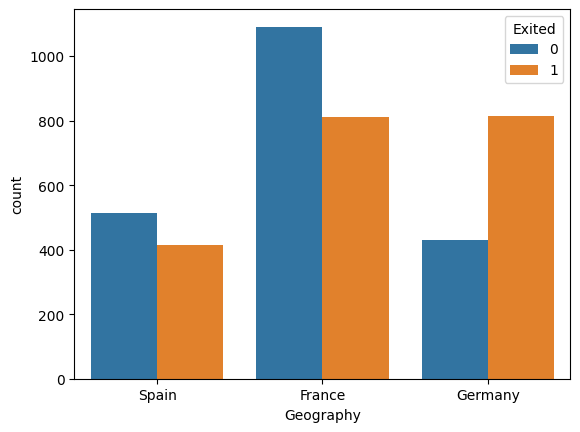

In [14]:
sns.countplot(data=df_train,x="Geography",hue="Exited")

In [15]:
df_train.groupby("Gender").Exited.mean()

Gender
Female    0.572362
Male      0.430902
Name: Exited, dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

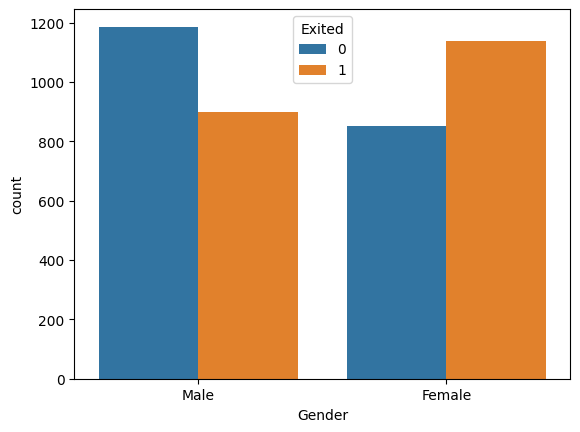

In [16]:
sns.countplot(data=df_train,x="Gender",hue="Exited")

In [17]:
df_train["Tenure"].value_counts()

Tenure
4     432
2     432
1     429
5     423
3     421
9     406
8     404
7     385
6     380
10    203
0     159
Name: count, dtype: int64

In [18]:
df_train.groupby("Tenure").Exited.mean()

Tenure
0     0.597484
1     0.540793
2     0.465278
3     0.505938
4     0.469907
5     0.494090
6     0.515789
7     0.459740
8     0.487624
9     0.524631
10    0.497537
Name: Exited, dtype: float64

<Axes: xlabel='Tenure', ylabel='count'>

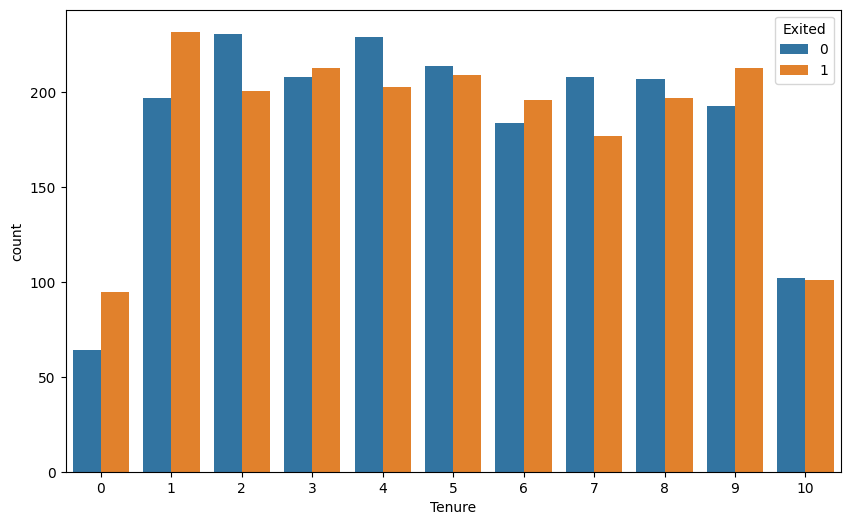

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_train,x="Tenure",hue="Exited")

In [20]:
df_train.groupby("NumOfProducts").Exited.mean()

NumOfProducts
1    0.601366
2    0.242340
3    0.936170
4    1.000000
Name: Exited, dtype: float64

<Axes: xlabel='NumOfProducts', ylabel='count'>

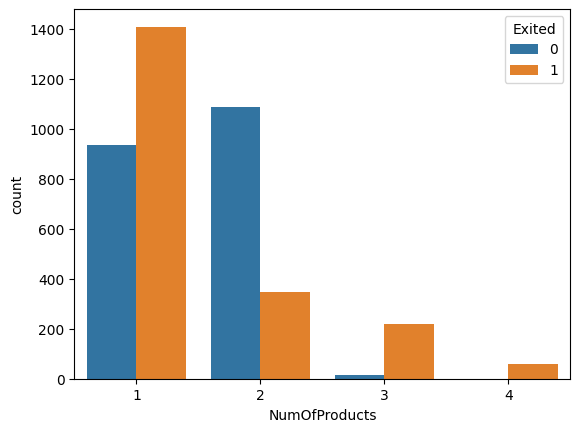

In [21]:
sns.countplot(data=df_train,x="NumOfProducts",hue="Exited")

In [22]:
df_train["NumOfProducts"].value_counts()

NumOfProducts
1    2343
2    1436
3     235
4      60
Name: count, dtype: int64

In [23]:
df_train[df_train["NumOfProducts"]==4]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
70,Konovalova,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
1254,Dumetolisa,628,France,Female,46,1,46870.43,4,1,0,31272.14,1
1469,Wright,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1
1488,Kornilova,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1
1701,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1
1876,Steele,640,Germany,Male,39,9,131607.28,4,0,1,6981.43,1
2124,Galkin,704,France,Male,32,7,127785.17,4,0,0,184464.70,1
2196,Ugochukwutubelum,773,Germany,Male,47,2,118079.47,4,1,1,143007.49,1
2285,Ramos,630,Germany,Male,50,3,129370.91,4,1,1,47775.34,1


In [24]:
df_train.groupby("HasCrCard").Exited.mean()

HasCrCard
0    0.513831
1    0.494273
Name: Exited, dtype: float64

<Axes: xlabel='Exited', ylabel='count'>

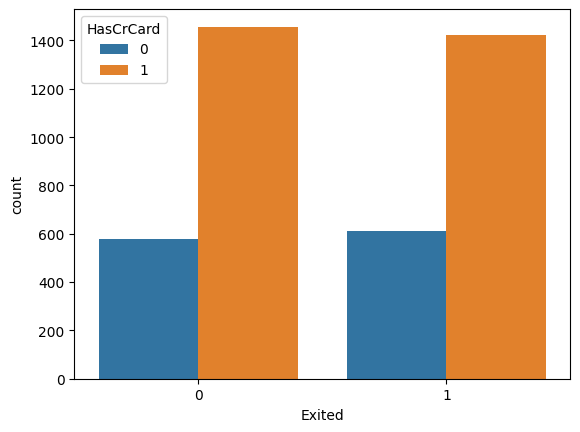

In [25]:
sns.countplot(data=df_train,x="Exited",hue="HasCrCard")

In [26]:
df_train.groupby("IsActiveMember").Exited.mean()

IsActiveMember
0    0.593437
1    0.390957
Name: Exited, dtype: float64

<Axes: xlabel='Exited', ylabel='count'>

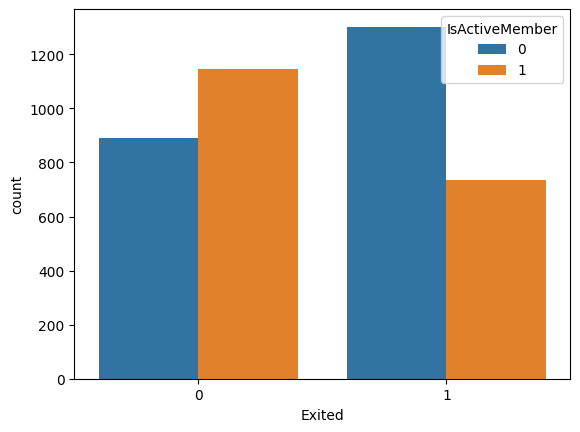

In [27]:
sns.countplot(data=df_train,x="Exited",hue="IsActiveMember")

<Axes: xlabel='Exited', ylabel='Age'>

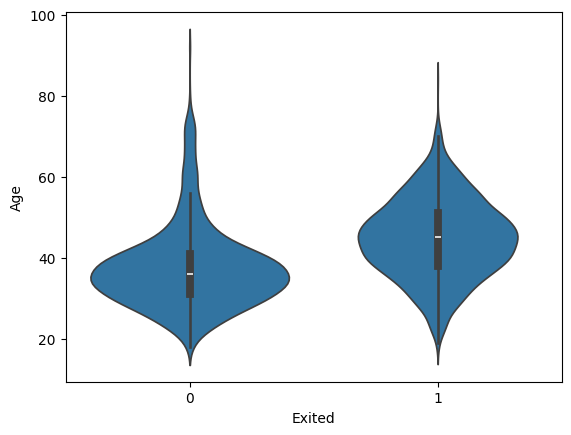

In [28]:
sns.violinplot(data=df_train, x="Exited", y="Age")

In [29]:
df_train[df_train["Age"]>40].Exited.mean()

np.float64(0.7010897768552153)

In [30]:
df_train[df_train["Age"]<40].Exited.mean()

np.float64(0.30319959370238697)

<Axes: xlabel='Exited', ylabel='CreditScore'>

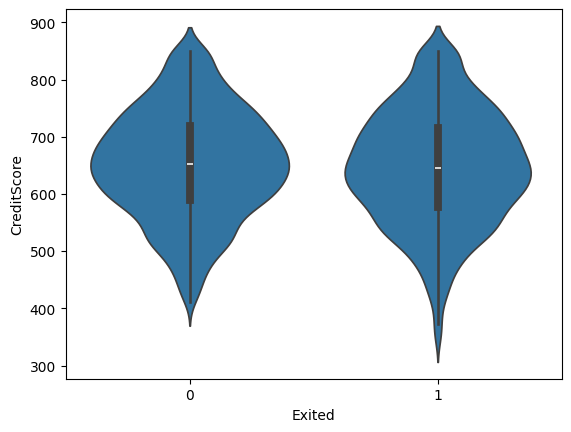

In [31]:
sns.violinplot(data=df_train,x="Exited",y="CreditScore")

<Axes: xlabel='Exited', ylabel='Balance'>

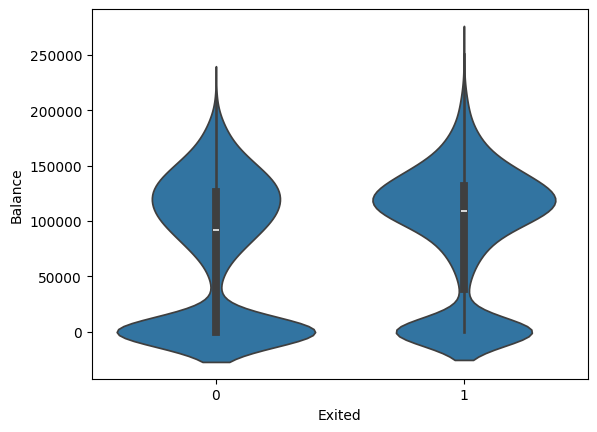

In [32]:
sns.violinplot(data=df_train,x="Exited",y="Balance")

In [33]:
df_train[df_train["Balance"]>100000].Exited.mean()

np.float64(0.5706880301602262)

<Axes: xlabel='EstimatedSalary', ylabel='Exited'>

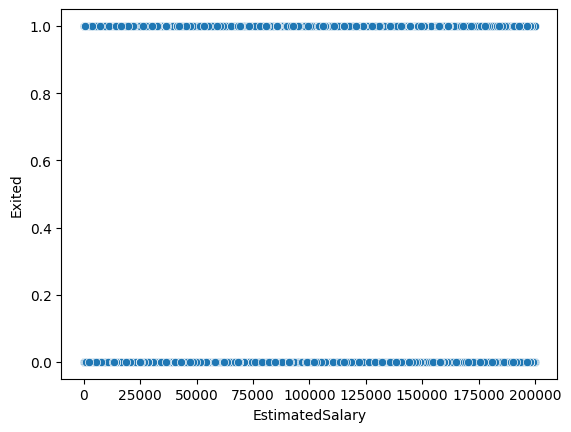

In [34]:
sns.scatterplot(data=df_train,y="Exited",x="EstimatedSalary")

#### Some Observations :
1. We will take Geography , gender ,HasCrCard ,IsActiveMember  and Tenuer columns with no change
2. for the NumOfProducts column i will replace 2,3,4 by more_than_1
3. for the numerical columns they need scaling 

# Pre-Processing Data

In [64]:
cat = list(df_train.select_dtypes(include="object"))

In [65]:
cat

['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

In [66]:
numer = list(df_train.select_dtypes(exclude="object"))

In [67]:
numer

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Balance',
 'EstimatedSalary',
 'Exited']

In [39]:
numer.remove("Exited")

In [40]:
#Normalization
for i in numer :
    df_train[i] = (df_train[i] - df_train[i].min())/(df_train[i].max()-df_train[i].min())

In [46]:
df_train["NumOfProducts"].replace([2,3,4],'>1',inplace=True)

In [48]:
df_train.sample(2)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,Pickering,0.512,Spain,Male,0.256757,8,0.616635,>1,1,0,0.445666,0
4981,Bray,0.634,Spain,Female,0.067568,6,0.542454,>1,0,0,0.848723,1


In [49]:
df_train.isna().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [50]:
## we don't will use this col
df_train.drop(columns="Surname",inplace=True)

In [53]:
cat.remove("Surname")

In [56]:
df_train["IsActiveMember"].info()

<class 'pandas.core.series.Series'>
Index: 4074 entries, 8165 to 9998
Series name: IsActiveMember
Non-Null Count  Dtype 
--------------  ----- 
4074 non-null   object
dtypes: object(1)
memory usage: 63.7+ KB


In [69]:
## encoding categorical columns
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in cat :
    df_train[i] = labelencoder.fit_transform(df_train[i])

In [70]:
df_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8165,0.512,2,1,0.256757,9,0.616635,1,1,0,0.445666,0
6409,0.666,0,0,0.202703,10,0.000000,1,1,1,0.193963,0
2157,0.788,0,0,0.351351,4,0.000000,1,1,1,0.945506,0
1618,0.694,0,1,0.121622,9,0.562873,1,1,0,0.453130,0
1633,0.424,0,1,0.229730,8,0.000000,0,0,0,0.244415,0
...,...,...,...,...,...,...,...,...,...,...,...
9981,0.296,1,1,0.324324,4,0.605982,0,1,1,0.267305,1
9982,0.610,1,0,0.378378,8,0.546617,0,1,0,0.575969,1
9991,0.494,0,0,0.472973,5,0.352259,0,1,0,0.347043,1
9997,0.718,0,0,0.243243,8,0.000000,0,0,1,0.210478,1


# Training The Model

In [71]:
Y = df_train["Exited"]
X = df_train.drop(columns="Exited")

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_tes = train_test_split(X,Y,test_size=0.2,random_state=42)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
calssifier = {
    "LogisticRegression" : LogisticRegression(),
    "RandomForest" : RandomForestClassifier(),
    "GradientBoosting" : GradientBoostingClassifier()
}

In [77]:
def train(classifier,x,y) :
    for i in classifier.values():
        i.fit(x,y)

In [78]:
train(calssifier,X_train,Y_train)

In [81]:
from sklearn.metrics import  classification_report,f1_score,confusion_matrix,accuracy_score,precision_score

In [86]:
models = list(calssifier.values())
y_pred_1 = predict(models[0],X_test)
y_pred_2 = predict(models[1],X_test)
y_pred_3 = predict(models[2],X_test)

In [89]:
print("LogisticRegression")
print("-----------------------------------------")
print(classification_report(Y_tes,y_pred_1))
print("-----------------------------------------")
print(f1_score(Y_tes,y_pred_1))
print("-----------------------------------------")

LogisticRegression
-----------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       443
           1       0.68      0.68      0.68       372

    accuracy                           0.71       815
   macro avg       0.70      0.70      0.70       815
weighted avg       0.71      0.71      0.71       815

-----------------------------------------
0.679144385026738
-----------------------------------------


In [90]:
print("RandomForest")
print("-----------------------------------------")
print(classification_report(Y_tes,y_pred_2))
print("-----------------------------------------")
print(f1_score(Y_tes,y_pred_2))
print("-----------------------------------------")

RandomForest
-----------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       443
           1       0.69      0.69      0.69       372

    accuracy                           0.72       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.72      0.72      0.72       815

-----------------------------------------
0.6916890080428955
-----------------------------------------


In [91]:
print("GradientBoosting")
print("-----------------------------------------")
print(classification_report(Y_tes,y_pred_3))
print("-----------------------------------------")
print(f1_score(Y_tes,y_pred_2))
print("-----------------------------------------")

GradientBoosting
-----------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       443
           1       0.71      0.71      0.71       372

    accuracy                           0.73       815
   macro avg       0.73      0.73      0.73       815
weighted avg       0.73      0.73      0.73       815

-----------------------------------------
0.6916890080428955
-----------------------------------------


<Axes: >

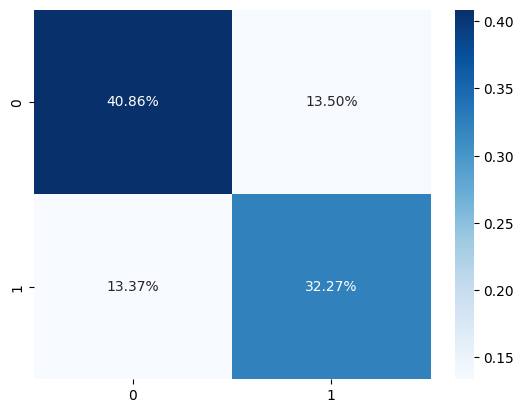

In [96]:
import numpy as np
cf_matrix = confusion_matrix(Y_tes, y_pred_3)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

### is not a good accuracy we will try to use less columns

In [102]:
df_train.corr()["Exited"].sort_values()

NumOfProducts     -0.235863
IsActiveMember    -0.201877
Gender            -0.141422
CreditScore       -0.034660
Tenure            -0.020661
HasCrCard         -0.017800
EstimatedSalary    0.006173
Geography          0.055035
Balance            0.146820
Age                0.343870
Exited             1.000000
Name: Exited, dtype: float64

In [103]:
X = df_train.loc[:,["Age","Balance","Gender","IsActiveMember","NumOfProducts"]]

In [104]:
y = df_train["Exited"]

In [107]:
X_train,X_test,Y_train,Y_tes = train_test_split(X,y,test_size=0.2,random_state=42)

In [108]:
train(calssifier,X_train,Y_train)

In [109]:
models = list(calssifier.values())
y_pred_1 = predict(models[0],X_test)
y_pred_2 = predict(models[1],X_test)
y_pred_3 = predict(models[2],X_test)

In [110]:
print("LogisticRegression")
print("-----------------------------------------")
print(classification_report(Y_tes,y_pred_1))
print("-----------------------------------------")
print(f1_score(Y_tes,y_pred_1))
print("-----------------------------------------")

LogisticRegression
-----------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       443
           1       0.68      0.69      0.69       372

    accuracy                           0.71       815
   macro avg       0.71      0.71      0.71       815
weighted avg       0.71      0.71      0.71       815

-----------------------------------------
0.688
-----------------------------------------


In [111]:
print("RandomForest")
print("-----------------------------------------")
print(classification_report(Y_tes,y_pred_2))
print("-----------------------------------------")
print(f1_score(Y_tes,y_pred_2))
print("-----------------------------------------")

RandomForest
-----------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       443
           1       0.67      0.69      0.68       372

    accuracy                           0.71       815
   macro avg       0.70      0.71      0.71       815
weighted avg       0.71      0.71      0.71       815

-----------------------------------------
0.6834437086092715
-----------------------------------------


In [112]:
print("GradientBoosting")
print("-----------------------------------------")
print(classification_report(Y_tes,y_pred_3))
print("-----------------------------------------")
print(f1_score(Y_tes,y_pred_2))
print("-----------------------------------------")

GradientBoosting
-----------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       443
           1       0.71      0.72      0.72       372

    accuracy                           0.74       815
   macro avg       0.74      0.74      0.74       815
weighted avg       0.74      0.74      0.74       815

-----------------------------------------
0.6834437086092715
-----------------------------------------


## Model Saving 

In [114]:
import joblib
joblib.dump(models[2], 'GradientBoosting_model.pkl')

['GradientBoosting_model.pkl']